In [3]:
import numpy as np
import copy
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
stor={0:'Lannion',1:'Le Havre',2:'Caen',3:'Lille',4:'Orleans', 5:'Besançon',6:'Lyon',7:'Poitiers'}
dest={0:'Paris Nord',1:'Paris Sud',2:'Strasbourg',3:'Nantes',4:'Bordeaux', 5:'Toulouse',6:'Montpellier',7:'Marseille'}
c=np.array([[4.75,4.5,8.5,2.68,5.5,7.5,9.25,10.33],
           [2.125,2.125,5.99,3.65,5.9,7.6,8.16,8.42],
           [2.16,2.13,6.17,2.71,5.2,7.1,7.85,8.5],
           [1.9,2.13,4.68,5.28,7.33,7.96,8.4,8.46],
           [1.6,1.31,5.18,3.05,4.03,4.83,5.41,6.58],
           [3.68,3.42,2.38,6.28,6.63,6.16,4.83,4.86],
           [4.11,3.83,4.28,6.11,4.85,4.7,2.78,2.82],
           [3.35,3.08,7.13,2.,2.28,4.18,6.38,7.78]])

In [5]:
G = nx.Graph()

In [9]:
ls=list(stor.values())
ld=list(dest.values())

In [10]:
G.add_nodes_from(ls, bipartite=0)
G.add_nodes_from(ld, bipartite=1)

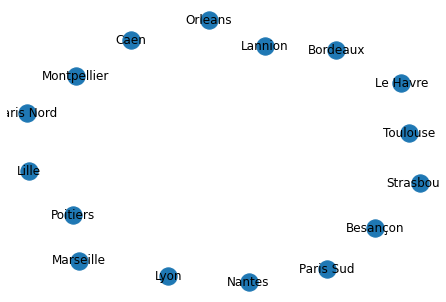

In [11]:
nx.draw(G,with_labels=True)

In [12]:
costs=[(stor[i],dest[j],c[i,j]) for j in range(c.shape[0]) for i in range(c.shape[0])]

In [13]:
costs

[('Lannion', 'Paris Nord', 4.75),
 ('Le Havre', 'Paris Nord', 2.125),
 ('Caen', 'Paris Nord', 2.16),
 ('Lille', 'Paris Nord', 1.9),
 ('Orleans', 'Paris Nord', 1.6),
 ('Besançon', 'Paris Nord', 3.68),
 ('Lyon', 'Paris Nord', 4.11),
 ('Poitiers', 'Paris Nord', 3.35),
 ('Lannion', 'Paris Sud', 4.5),
 ('Le Havre', 'Paris Sud', 2.125),
 ('Caen', 'Paris Sud', 2.13),
 ('Lille', 'Paris Sud', 2.13),
 ('Orleans', 'Paris Sud', 1.31),
 ('Besançon', 'Paris Sud', 3.42),
 ('Lyon', 'Paris Sud', 3.83),
 ('Poitiers', 'Paris Sud', 3.08),
 ('Lannion', 'Strasbourg', 8.5),
 ('Le Havre', 'Strasbourg', 5.99),
 ('Caen', 'Strasbourg', 6.17),
 ('Lille', 'Strasbourg', 4.68),
 ('Orleans', 'Strasbourg', 5.18),
 ('Besançon', 'Strasbourg', 2.38),
 ('Lyon', 'Strasbourg', 4.28),
 ('Poitiers', 'Strasbourg', 7.13),
 ('Lannion', 'Nantes', 2.68),
 ('Le Havre', 'Nantes', 3.65),
 ('Caen', 'Nantes', 2.71),
 ('Lille', 'Nantes', 5.28),
 ('Orleans', 'Nantes', 3.05),
 ('Besançon', 'Nantes', 6.28),
 ('Lyon', 'Nantes', 6.11),
 ('Po

In [15]:
G.add_weighted_edges_from(costs)

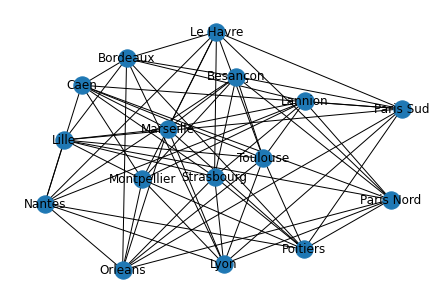

In [16]:
nx.draw(G,with_labels=True)

In [17]:
matching = nx.bipartite.minimum_weight_full_matching(G, top_nodes=ls)

D:\Program Files (x86)\Anaconda3\lib\site-packages\networkx\algorithms\bipartite\matching.py:569: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  weights_sparse = biadjacency_matrix(


In [26]:
assignment_graph = nx.Graph()


In [27]:
tc=0
for a, b in matching.items():
    assignment_graph.add_edge(a, b, weight=G[a][b]['weight'])  # Add weight attribute
    tc+=G[a][b]['weight']


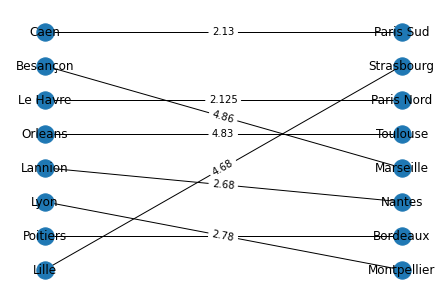

In [28]:
pos = nx.bipartite_layout(assignment_graph, ls)
nx.draw(assignment_graph, pos=pos, with_labels=True)
edge_labels = nx.get_edge_attributes(assignment_graph, 'weight')
nx.draw_networkx_edge_labels(assignment_graph, pos=pos, edge_labels=edge_labels)
plt.show()


In [32]:
print(edge_labels)

{('Lille', 'Strasbourg'): 4.68, ('Poitiers', 'Bordeaux'): 2.28, ('Lyon', 'Montpellier'): 2.78, ('Lannion', 'Nantes'): 2.68, ('Orleans', 'Toulouse'): 4.83, ('Le Havre', 'Paris Nord'): 2.125, ('Besançon', 'Marseille'): 4.86, ('Caen', 'Paris Sud'): 2.13}


In [33]:
sum(edge_labels.values())

26.365